1. Load the dataset to python environment,

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
data = pd.read_csv('titanic_dataset.csv',index_col = 'PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


<Axes: ylabel='PassengerId'>

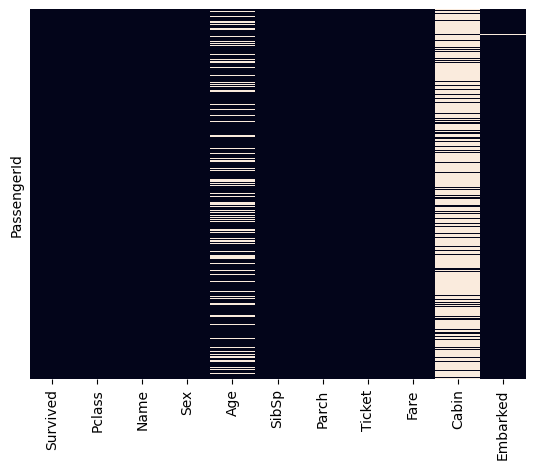

In [4]:
print(data.isna().sum())
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

As the columns, 'Cabin','Name','Ticket' and 'Fare' are irrelevant, dropping them

In [5]:
data = data.drop(['Name','Fare','Ticket','Cabin'],axis=1)

Filling the missing values

In [7]:
#data['Age'] = data['Age'].fillna(data['Age'].median())
data['Age'].fillna(30, inplace=True)
data['Embarked'].fillna('S', inplace=True)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64


<Axes: ylabel='PassengerId'>

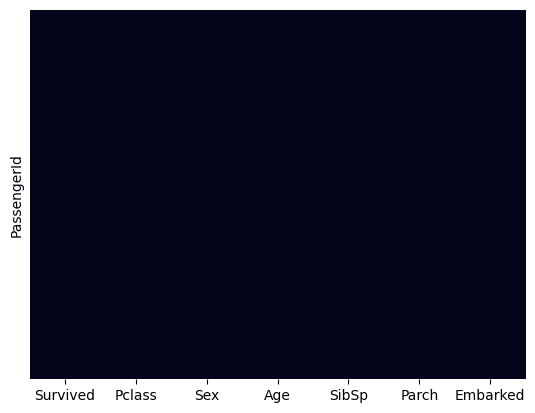

In [8]:
print(data.isna().sum())
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

Finding outliers

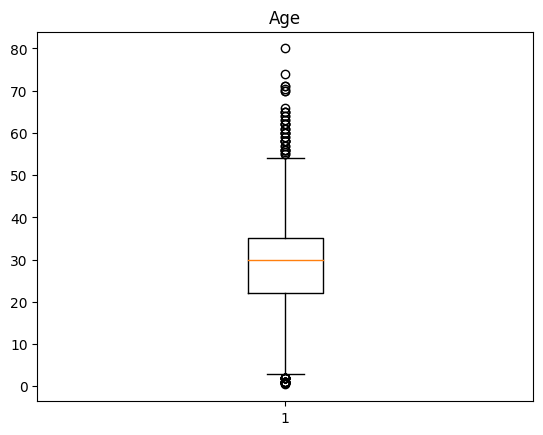

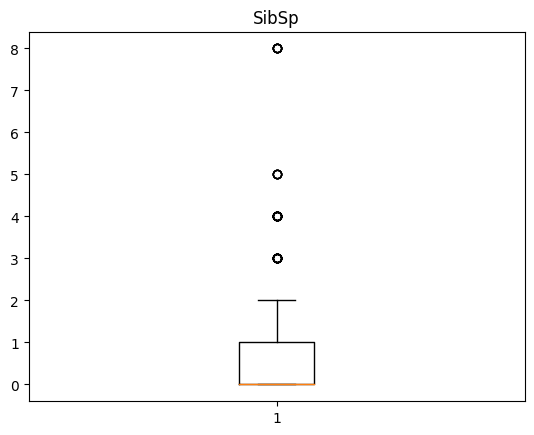

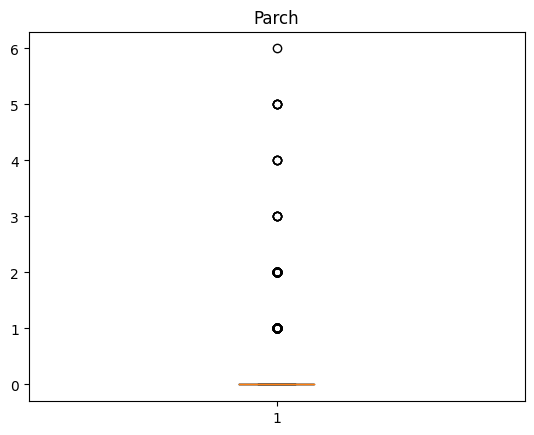

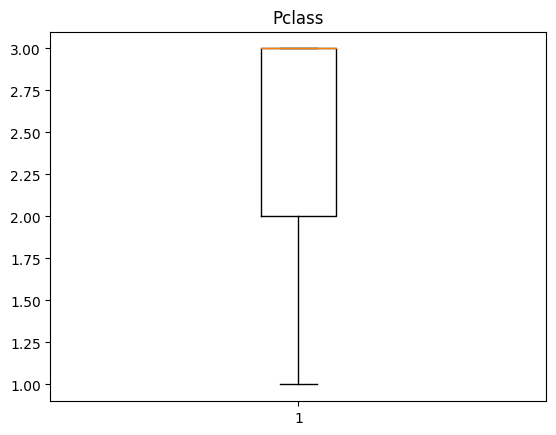

In [9]:
num_cols = ['Age', 'SibSp', 'Parch','Pclass']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i]) # boxplot to detect outliers
    plt.title(i)

 a) 'Sibsp',Parch ' contain natural number outliers below 10, so there is nothing unusual in it,so those outliers cannot be removed

 b)'Age' contains a lot of outliers, so moving on to find the number and nature of outliers

In [10]:
Q1 = np.percentile(data['Age'],25,method = 'midpoint')
Q2 = np.percentile(data['Age'],50,method = 'midpoint')
Q3 = np.percentile(data['Age'],75,method = 'midpoint')
IQR = Q3-Q1
low_lim = Q1 -1.5*IQR
up_lim = Q3 +1.5*IQR
outlier =[]
for x in data ["Age"]:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [11]:
len(outlier)

66

Finding indices of outliers lower than lower limit and removing them

In [12]:
indices = data['Age']<low_lim
indices = data.loc[indices].index

In [13]:
data.drop(indices,inplace=True)

In [14]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,867.000000,867.000000,867.000000,867.000000,867.000000
mean,0.377163,2.302191,30.545559,0.490196,0.354095
std,0.484956,0.839846,12.277698,1.069559,0.795696
min,0.000000,1.000000,3.000000,0.000000,0.000000
25%,0.000000,2.000000,23.000000,0.000000,0.000000
50%,0.000000,3.000000,30.000000,0.000000,0.000000
75%,1.000000,3.000000,35.500000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [16]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,2
2,1,1,0,38.0,1,0,0
3,1,3,0,26.0,0,0,2
4,1,1,0,35.0,1,0,2
5,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,2
888,1,1,0,19.0,0,0,2
889,0,3,0,30.0,1,2,2


Splitting

In [17]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [18]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

**SVM**

In [41]:
from sklearn.svm import SVC
svm_cls = SVC(kernel='linear')
svm_model = svm_cls.fit(X_train,y_train)
pred = svm_model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,pred)

array([[85, 21],
       [20, 48]])

**KNN**

In [43]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
  classifier.fit(X_train,y_train)
  k_predictions = classifier.predict(X_test)
  acs = accuracy_score(y_test,k_predictions)
  metric_k.append(acs)

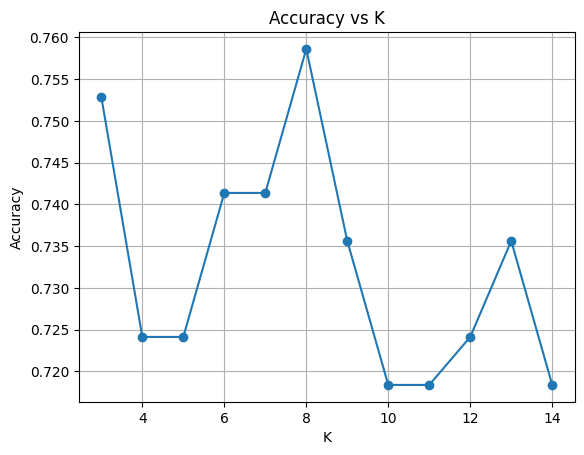

In [44]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.grid()

**optimum k=8**

In [45]:
classifier = KNeighborsClassifier(n_neighbors = 8,metric = 'euclidean')
classifier.fit(X_train,y_train)
k_predictions = classifier.predict(X_test)

In [46]:
confusion_matrix(y_test,k_predictions)

array([[99,  7],
       [35, 33]])

**K-Fold Cross Validation on SVM model**

In [47]:
from sklearn.model_selection import KFold
k = KFold(10)
k

KFold(n_splits=10, random_state=None, shuffle=False)

In [52]:
from sklearn.model_selection import cross_val_score
cv_value = cross_val_score(svm_model,X,y,cv = k)

In [53]:
cv_value

array([0.81609195, 0.82758621, 0.77011494, 0.86206897, 0.75862069,
       0.8045977 , 0.73563218, 0.73255814, 0.86046512, 0.79069767])

**KFold on KNN model**

In [54]:
cv_knn = cross_val_score(classifier,X,y,cv = k)

**Stratified KFold Cross Validation on SVM**

In [55]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)

In [56]:
skf_svm = cross_val_score(svm_model,X,y,cv=skf)

**Stratified KFold Cross Validation on KNN**

In [57]:
skf_knn = cross_val_score(classifier,X,y,cv=skf)

In [58]:
print('SVM Model Accuracy : ',accuracy_score(y_test,pred))
print('KNN Model Accuracy : ',accuracy_score(y_test,k_predictions))
print('\nAfter KFold Cross Validation ')
print('SVM Model Accuracy : ',np.mean(cv_value))
print('KNN Model Accuracy : ',np.mean(cv_knn))

print('\nAfter Stratified KFold Cross Validation ')
print('SVM Model Accuracy : ',np.mean(skf_svm))
print('KNN Model Accuracy : ',np.mean(skf_knn))



SVM Model Accuracy :  0.764367816091954
KNN Model Accuracy :  0.7586206896551724

After KFold Cross Validation 
SVM Model Accuracy :  0.7958433573910718
KNN Model Accuracy :  0.7567628976209569

After Stratified KFold Cross Validation 
SVM Model Accuracy :  0.7958166265704356
KNN Model Accuracy :  0.7566693397487303


In [59]:
print('Cross validation has improved SVM model,but not KNN model')

Cross validation has improved SVM model,but not KNN model
